In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2024-11-22 18:00:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   221MB/s    in 0.7s    

2024-11-22 18:00:26 (221 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(len(dirnames), len(filenames), dirpath)

2 0 10_food_classes_10_percent
10 0 10_food_classes_10_percent/train
0 75 10_food_classes_10_percent/train/steak
0 75 10_food_classes_10_percent/train/chicken_wings
0 75 10_food_classes_10_percent/train/ramen
0 75 10_food_classes_10_percent/train/chicken_curry
0 75 10_food_classes_10_percent/train/grilled_salmon
0 75 10_food_classes_10_percent/train/hamburger
0 75 10_food_classes_10_percent/train/ice_cream
0 75 10_food_classes_10_percent/train/fried_rice
0 75 10_food_classes_10_percent/train/sushi
0 75 10_food_classes_10_percent/train/pizza
10 0 10_food_classes_10_percent/test
0 250 10_food_classes_10_percent/test/steak
0 250 10_food_classes_10_percent/test/chicken_wings
0 250 10_food_classes_10_percent/test/ramen
0 250 10_food_classes_10_percent/test/chicken_curry
0 250 10_food_classes_10_percent/test/grilled_salmon
0 250 10_food_classes_10_percent/test/hamburger
0 250 10_food_classes_10_percent/test/ice_cream
0 250 10_food_classes_10_percent/test/fried_rice
0 250 10_food_classes_10_p

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_10_percent = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

test_data_10_percent = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tf_keras

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf_keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Savling TensorBoard Log Files To : {log_dir}")
  return tensorboard_callback

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
IMAGE_SHAPE = (224, 224)

def create_model(model_url, num_classes=10):
    feature_extractor_layer = hub.KerasLayer(
        model_url,
        trainable=False,
        input_shape=IMAGE_SHAPE + (3,),
        name="feature_extraction_layer"
    )

    model = tf_keras.Sequential([
        feature_extractor_layer,
        tf_keras.layers.Flatten(),
        tf_keras.layers.Dense(num_classes, activation="softmax", name="output_layer")
    ])

    return model

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
resnet_model.compile(
    loss="categorical_crossentropy",
    optimizer = tf_keras.optimizers.Adam(),
    metrics=["accuracy"]
  )

In [32]:
resnet_history = resnet_model.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=len(test_data_10_percent)
)

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 1.0000

KeyboardInterrupt: 

In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

In [29]:
efficientnet_model = create_model(model_url=efficientnet_url, num_classes=train_data_10_percent.num_classes)

In [30]:
efficientnet_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf_keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [33]:
efficientnet_history = efficientnet_model.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=len(test_data_10_percent),
    callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficient")]
)

Savling TensorBoard Log Files To : tensorflow_hub/efficient/20241122-182228
Epoch 1/5
24/24 [==============================] - 13s 543ms/step - loss: 0.4372 - accuracy: 0.9040 - val_loss: 0.5076 - val_accuracy: 0.8800
Epoch 2/5
24/24 [==============================] - 11s 481ms/step - loss: 0.4070 - accuracy: 0.9267 - val_loss: 0.5058 - val_accuracy: 0.8668
Epoch 3/5
24/24 [==============================] - 9s 406ms/step - loss: 0.3389 - accuracy: 0.9520 - val_loss: 0.4643 - val_accuracy: 0.8744
Epoch 4/5
24/24 [==============================] - 10s 427ms/step - loss: 0.3043 - accuracy: 0.9600 - val_loss: 0.4613 - val_accuracy: 0.8744
Epoch 5/5
24/24 [==============================] - 10s 421ms/step - loss: 0.2858 - accuracy: 0.9560 - val_loss: 0.4409 - val_accuracy: 0.8792


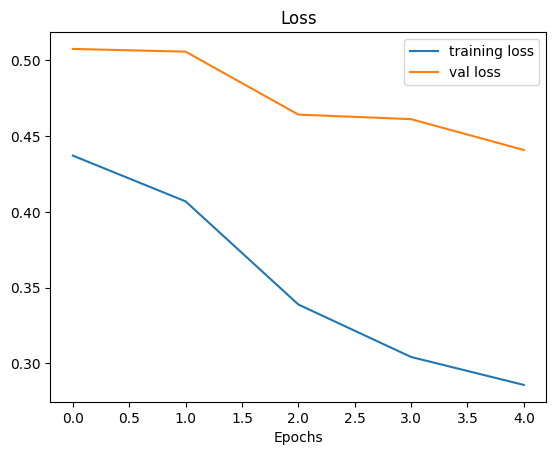

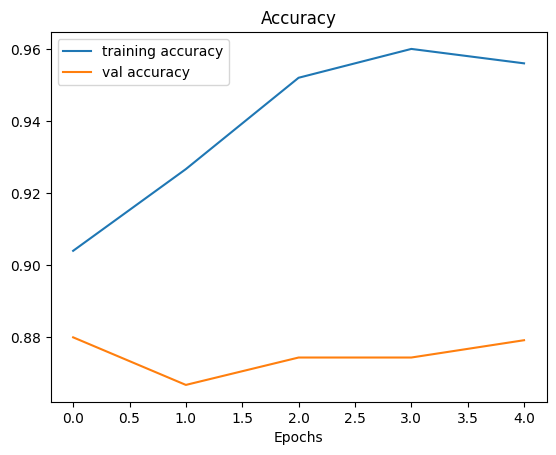

In [34]:
plot_loss_curves(efficientnet_history)

In [35]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [ ]:
len(efficientnet_model.layers[0].weights)